# Cho tập tin Fifa2018_dataset.csv

In [1]:
import pyspark
from pyspark import SparkContext

sc = SparkContext(master='local', appName = 'Spark context')

In [2]:
import findspark
findspark.init()
import pyspark
findspark.find()

'/Users/vunguyen/server/spark-2.4.6-bin-hadoop2.7'

In [3]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
'''
conf= pyspark.SparkConf().setAppName('tets_app').setMaster('local')
sc=pyspark.SparkContext(conf=conf)
sc
'''

#sc= SparkContext()
spark = (SparkSession
         .builder
         .appName('Session Spark App')
         .getOrCreate())
spark

1. Đọc file Fifa2018_dataset.csv

In [4]:
fifa_df = spark.read.csv('File/Fifa2018_dataset.csv', header = True, inferSchema=True)

2. in schema. Hiển thị 2 dòng đầu tiên, cho biết file có bao nhiêu dòng

In [5]:
for row in fifa_df.head(2):
    print(row)
    print('\n')

Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, LD

In [6]:
print('Number of rows in dataframe: {}'.format(fifa_df.count()) )

Number of rows in dataframe: 17981


3. Tạo view

In [7]:
fifa_df.createOrReplaceTempView('fifa_view')

4. thực hiện querry sql dể lấy col Age của các vdv 'Germany'. Hiển thị 3 dòng đầu, in thống kê

In [8]:
query = '''SELECT Age FROM fifa_view WHERE Nationality == "Germany"'''
fifa_germany_age = spark.sql(query)

In [9]:
fifa_germany_age.show()

+---+
|Age|
+---+
| 31|
| 27|
| 28|
| 28|
| 28|
| 27|
| 28|
| 25|
| 25|
| 26|
| 23|
| 24|
| 25|
| 30|
| 28|
| 21|
| 29|
| 21|
| 21|
| 21|
+---+
only showing top 20 rows



In [10]:
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293756|
|    min|               16|
|    max|               36|
+-------+-----------------+



In [11]:
fifa_germany_age_pandas = fifa_germany_age.toPandas()

In [12]:
import matplotlib.pyplot as plt

5. Trực quan hoá, nhận xét biểu đồ

Hầu hết các vdv có độ tuổi từ 25-30. số lượng vdv từ 20-25 là cao nhất, có thể thấy độ tuổi vdv trung bình khá trẻ

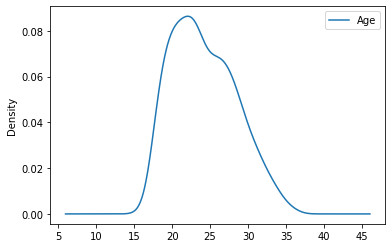

In [13]:
fifa_germany_age_pandas.plot(kind='density')
plt.show()

6. Cho biết mỗi độ tuổi có bao nhiêu cầu thủ. Độ tuổi tb của mỗi quốc gia là bao nhiêu?

In [14]:
fifa_df.groupBy('Age').count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 47|    1|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 43|    2|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
+---+-----+
only showing top 20 rows



In [15]:
fifa_df.groupBy('Nationality').avg('Age').show()

+--------------+------------------+
|   Nationality|          avg(Age)|
+--------------+------------------+
|          Chad|              25.0|
|        Russia| 25.23202614379085|
|      Paraguay| 26.10144927536232|
|       Senegal|25.046511627906977|
|        Sweden|25.119565217391305|
|        Guyana|              28.0|
|       Eritrea|              32.0|
|   Philippines|25.666666666666668|
|          Fiji|              29.0|
|        Turkey|25.127147766323024|
|          Iraq|              26.0|
|       Germany| 24.20263157894737|
|St Kitts Nevis|26.666666666666668|
|       Comoros| 27.11111111111111|
|   Afghanistan|              22.0|
|   Ivory Coast| 24.10891089108911|
|         Sudan|              22.5|
|        France|24.634969325153374|
|        Greece|24.418367346938776|
|        Kosovo|           23.9375|
+--------------+------------------+
only showing top 20 rows



7. Age/Strength lớn/nhỏ nhất của mỗi quốc gia

In [17]:
from pyspark.sql import functions as F
fifa_df.groupBy('Nationality').agg(F.min('Age'),
                                  F.max('Age'),
                                  F.min('Strength'),
                                  F.max('Strength')).show()

+--------------+--------+--------+-------------+-------------+
|   Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+--------------+--------+--------+-------------+-------------+
|          Chad|      24|      26|           73|           79|
|      Paraguay|      18|      37|           33|           91|
|        Russia|      17|      37|           26|           93|
|       Senegal|      18|      34|           37|           94|
|        Sweden|      17|      37|           21|           91|
|        Guyana|      25|      34|           47|           75|
|       Eritrea|      32|      32|           85|           85|
|   Philippines|      22|      28|           42|           76|
|          Fiji|      29|      29|           57|           57|
|        Turkey|      17|      39|           30|           90|
|          Iraq|      21|      30|           55|           86|
|       Germany|      16|      36|           28|           94|
|St Kitts Nevis|      23|      32|           32|       

8. Liệt kê danh sách các Club với 2 cách DataFrame và SQL

In [18]:
fifa_df.select('Club').distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



In [20]:
query = '''SELECT DISTINCT Club FROM fifa_view'''
fifa_clubs = spark.sql(query)
fifa_clubs.show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|     Cheltenham Town|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
+--------------------+
only showing top 20 rows



9. Sắp xếp data giảm dần theo Age

In [21]:
fifa_df_desc = fifa_df.orderBy(fifa_df['Age'].desc())

In [22]:
fifa_df_desc.select('Name','Age','Strength').show(3)

+-------------+---+--------+
|         Name|Age|Strength|
+-------------+---+--------+
|B. Richardson| 47|      47|
| E. El Hadary| 44|      73|
|     O. Pérez| 44|      66|
+-------------+---+--------+
only showing top 3 rows



10. Có bao nhiêu cầu thủ Name có 'Cristiano' theo 2 cách với DataFrame và SQL

In [23]:
people_with_Cristiano = fifa_df.where(fifa_df['Name'].contains('Cristiano'))
people_with_Cristiano.count()

3

In [24]:
people_with_Cristiano.select('Name').show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



In [25]:
query = '''SELECT * FROM fifa_view WHERE Name like "%Cristiano%"'''
people_with_Cristiano_2 = spark.sql(query)
people_with_Cristiano_2.count()

3

In [26]:
people_with_Cristiano_2.select('Name').show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+

